In [1]:
import numpy as np
import cv2 as cv
import csv
import matplotlib.pyplot as plt

### Decoding RLEs into masks for training

In [17]:
def decode_rle_to_mask(rle, height, width, viz=False):
    '''
    rle : run-length as string formated (start value, count)
    height : height of the mask 
    width : width of the mask
    returns binary mask
    '''
    rle = np.array(rle.split(' ')).reshape(-1, 2)
    mask = np.zeros((height*width, 1, 3))
    if viz:
        color = np.random.rand(3)
    else:
        color = [1,1,1]
    for i in rle:
        mask[int(i[0]):int(i[0])+int(i[1]), :, :] = color

    return mask.reshape(height, width, 3)

In [18]:
# Open train file
with open('train.csv', 'r', encoding='utf-8') as train:
    reader = csv.reader(train)
    # skip headers row
    next(reader)

    # pull the masks for the first image
    row = next(iter(reader))
    print(row[0])
    mask1 = decode_rle_to_mask(row[3],int(row[1]), int(row[2]))
    row = next(iter(reader))
    mask2 = decode_rle_to_mask(row[3],int(row[1]), int(row[2]))
    row = next(iter(reader))
    mask3 = decode_rle_to_mask(row[3],int(row[1]), int(row[2]))    

2008_006280


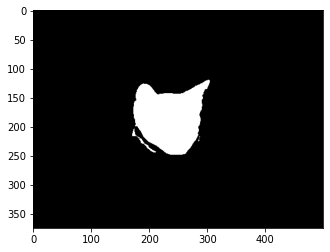

In [19]:
# Head mask
plt.imshow(mask1)

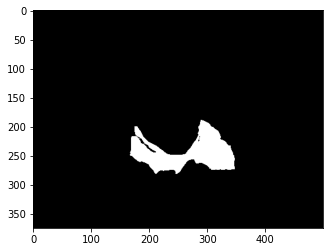

In [20]:
# Body mask
plt.imshow(mask2)

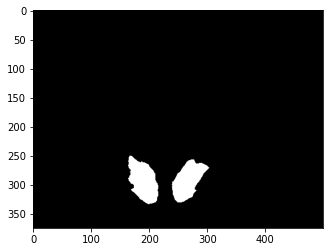

In [21]:
# Legs mask
plt.imshow(mask3)

[0. 1. 2. 3.]


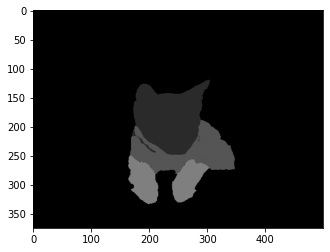

In [22]:
# combine masks for training
mixed_mask = mask1*1+mask2*2+mask3*3 #+mask4*4

# This is an image multi-segmentation task. The classes are:
    # 1: Head
    # 2: Body
    # 3: Legs
    # 4: Tail
# As seen below (notice this image does not include a tail in the image so no class 4)
print(np.unique(mixed_mask))

## For visualization purposes only, we can see the different segments colorcoded in the mixed mask by dividing my the sum of the class values (normalization)
## However, for submission, you should split the mask into 4 binary masks and RLE encode them individually as shown below.

plt.imshow(mixed_mask/6) # normalized just to show different segmentations (divide by sum of values)

### Training Pipeline

In [8]:
### START CODE HERE ###
### START CODE HERE ###
### START CODE HERE ###

### Encoding masks into RLE for submission

In [23]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask 
    1 - mask 
    0 - background
    Returns encoded run length 
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [24]:
mask1.shape

(375, 500, 3)

In [26]:
# IMPORTANT || Convert mask to grayscale
mask1 = mask1[:,:,0] # or using other methods depending on mask
mask1.shape

(375, 500)

In [27]:
rle = encode_mask_to_rle(mask1)
rle

'60302 3 60799 7 61297 9 61796 10 62294 12 62793 12 63191 1 63290 15 63689 9 63789 16 64187 13 64286 18 64686 16 64784 20 65185 18 65281 22 65684 20 65780 23 66183 22 66279 23 66683 23 66777 25 67182 25 67275 27 67682 25 67774 27 68181 27 68272 26 68680 29 68770 27 69180 30 69268 29 69680 30 69765 31 70180 31 70263 33 70679 33 70762 33 71179 34 71260 35 71679 35 71726 16 71756 39 72178 37 72219 76 72678 116 73178 115 73678 115 74178 115 74678 116 75178 116 75678 116 76179 115 76679 114 77179 113 77679 113 78177 115 78676 116 79176 116 79675 117 80175 117 80675 118 81175 118 81675 118 82175 118 82675 118 83174 118 83674 118 84174 118 84674 118 85174 118 85674 118 86174 117 86674 116 87174 116 87674 115 88174 115 88674 115 89174 114 89675 113 90175 113 90675 113 91175 114 91675 114 92175 114 92675 115 93176 114 93676 114 94177 113 94677 113 95177 113 95677 113 96177 112 96677 112 97178 111 97678 111 98178 111 98678 110 99177 111 99677 110 100181 105 100682 104 101182 104 101683 103 10217